### OCR Demo

In [9]:
import os
import cv2
import pyewts
from glob import glob
from tqdm import tqdm

from natsort import natsorted
from Lib.Data import OCRStatus
from Lib.Inference import OCRPipeline
from Lib.Exporter import JsonExporter, PageXMLExporter, TextExporter
from Lib.Config import init_monlam_line_model, init_monlam_layout_model
from Lib.Utils import show_image, create_dir, get_file_name, read_line_model_config, read_layout_model_config

converter = pyewts.pyewts()

In [3]:
data_path = "F:/Datasets/OCR/Glomanthang/Volumes/W2KG229028-v23"
output_dir = os.path.join(data_path, "Output")
create_dir(output_dir)

xml_exporter = PageXMLExporter(output_dir)
json_exporter = JsonExporter(output_dir)
text_exporter = TextExporter(output_dir)

img_ext = "jpg"
image_paths = natsorted(glob(f"{data_path}/*.{img_ext}"))

print(f"Images: {len(image_paths)}")

Images: 675


(896, 3000, 3)
F:/Datasets/OCR/Glomanthang/Volumes/W2KG229028-v23\I2KG2290530016.jpg
I2KG2290530016


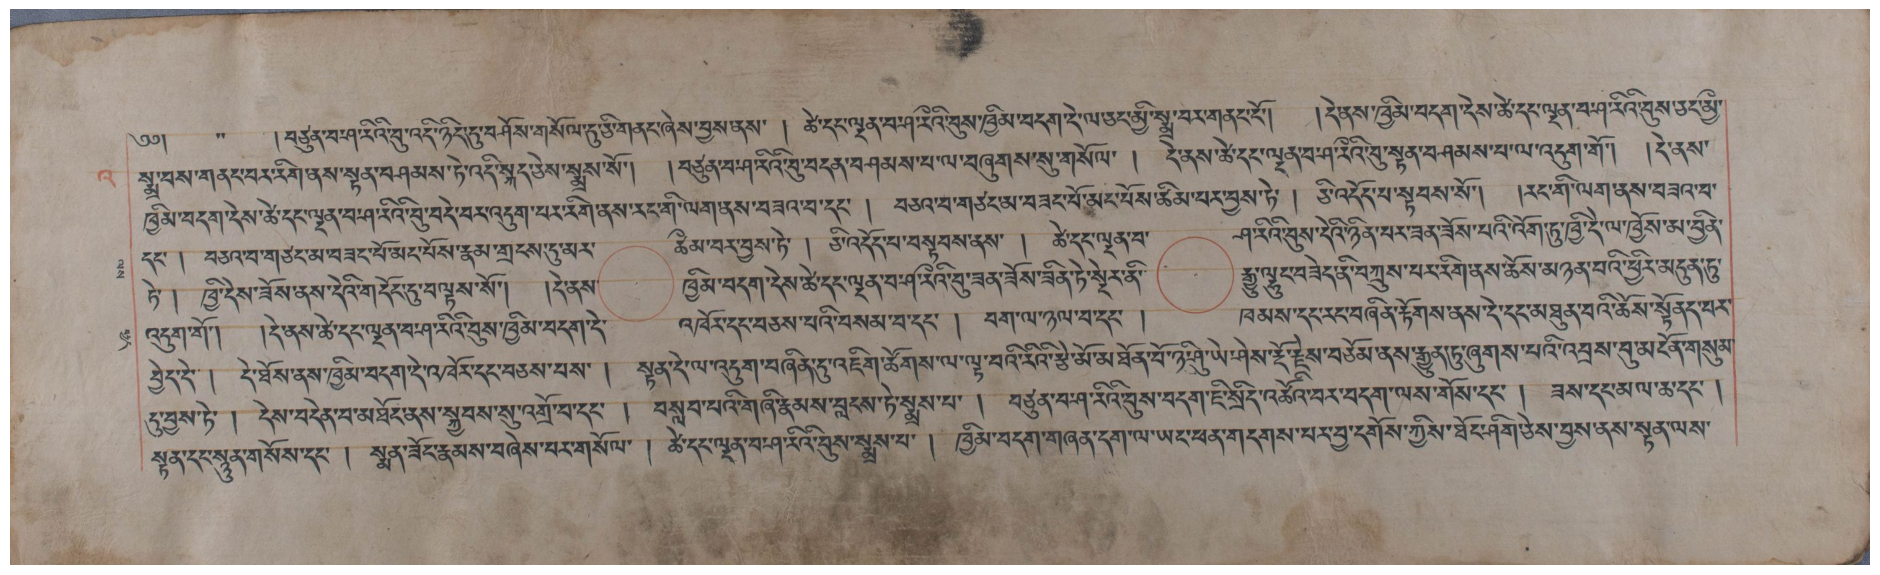

In [4]:
idx = 13
img = cv2.imread(image_paths[idx])
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
print(img.shape)
print(image_paths[idx])
image_name = get_file_name(image_paths[idx])
print(image_name)
show_image(img)

#### OCR via Pipelines using a line or layout model

In [5]:
# get model configs from HuggingFace models
line_model_config_file = init_monlam_line_model()
layout_model_config_file = init_monlam_layout_model()

line_model_config = read_line_model_config(line_model_config_file)
layout_model_config = read_layout_model_config(layout_model_config_file)


Fetching 6 files: 100%|██████████| 6/6 [00:13<00:00,  2.19s/it]


In [7]:
# layout model
#ocr_model_config = "Models/BDRC/Woodblock/config.json"
ocr_model_config = "Models/Namgyal/2024_11_29_23_39_Easter2/model_config.json"
ocr_pipeline = OCRPipeline(ocr_model_config, layout_model_config, output_dir)

f:\Github\Namgyal-OCR\.venv\Lib\site-packages\onnxruntime\capi\onnxruntime_inference_collection.py:115: UserWarning: Specified provider 'CUDAExecutionProvider' is not in available provider names.Available providers: 'AzureExecutionProvider, CPUExecutionProvider'
  warnings.warn(


Setting up CTC Decoder: ['!', '#', '%', "'", '°', '^', '$', '`', '(', ')', '+', '-', '.', '/', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', ':', '=', '?', '@', 'A', 'D', 'H', 'I', 'M', 'N', 'R', 'S', 'T', 'U', 'W', 'X', 'Y', '[', '\\', ']', '_', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'r', 's', 't', 'u', 'w', 'y', 'x', 'z', '|', '~', '§', '&', 'ä', 'ü', 'ö', '<', '>', ';', '卍', '卐', 'ऽ', '}']
Running OCR in Layout Mode
Layout Classes: ['background', 'image', 'line', 'margin', 'caption']


9
@//btsun ba sha ri'i bu 'di nyid du bshos gsol du ci gnang zhes byas nas /tshe dang ldan ba sha r-i'i bus khyim bdag de la cang myi smra bar gnang ngo //de nas khyim bdag des tshe dang ldan ba sha ri'i bus cang my-i 
 bas gnang bar rig nas stan bshams te 'di skad ces smras so //btsun ba sha ri'i bu bdan bshams pa la bzhugs su gsol /de nas tshe dang ldan ba sha r-i'i bu stan bshams pa la 'dug go //de nas 
 bdag des tshe dang ldan pa sha ri'i bu bde bar 'dug par rig nas rang gi lag nas bza' ba dang /bca' ba gtsang ma bzang po mang pos tshim par byas te /ci 'dod pa stabs so //rang gi lag nas bza' ba 
g /bca' ba gtsang ma bzang po mang pos rnam grangs du mar tsh-im bar byas te /ci 'dod pa bstabs nas /tshe dang ldan ba sha ri'i bus de'i nyin par zan zos pa'i 'og tu khyi de la khyos ma byin 
khyi des zos nas de'i gdong du bltas so //de nas khyim bdag des tshe dang ldan ba sha r-i'i bu zan zos zin te sder ni rgyu lhung bzed ni bkrus par rig nas chos mnyan ba'i phyir mdun tu 
ug go //de nas 

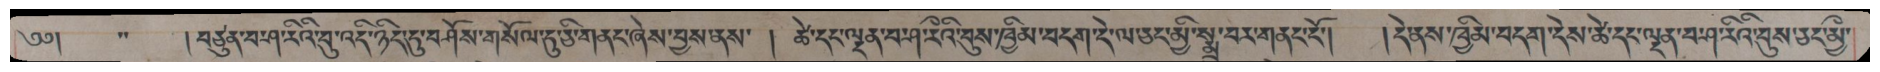

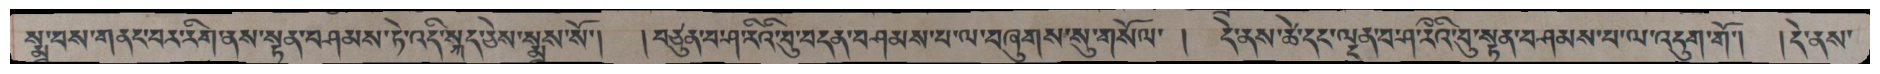

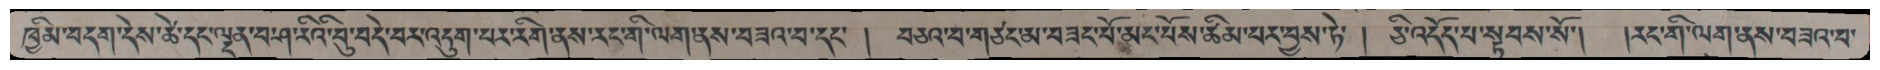

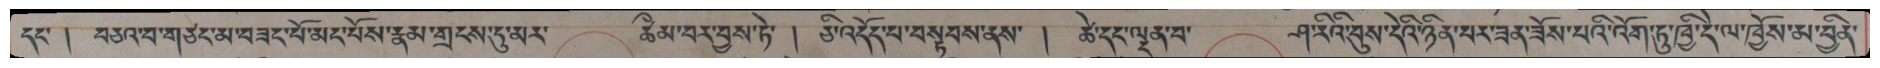

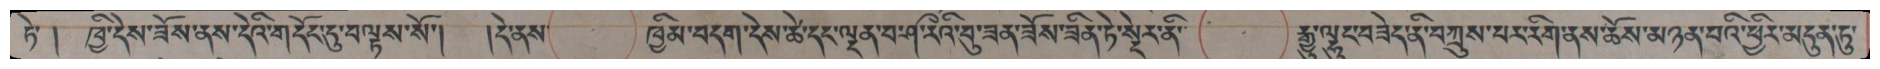

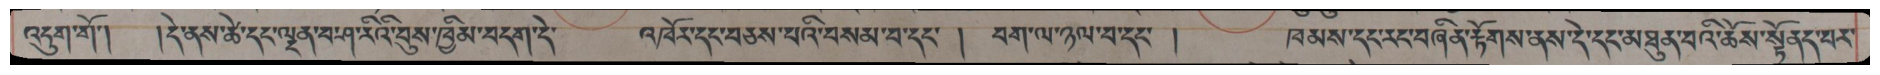

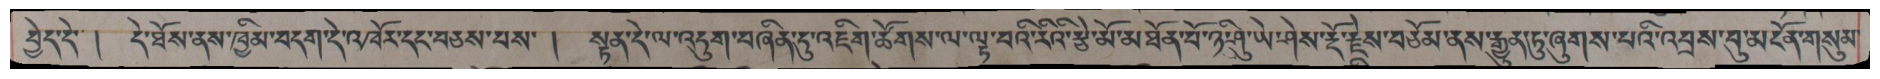

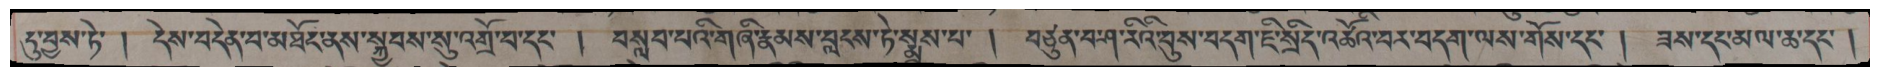

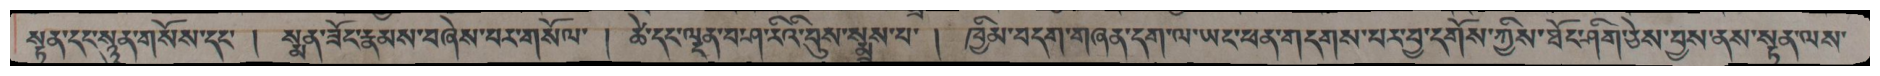

In [8]:
status, ocr_result = ocr_pipeline.run_ocr(img, image_name, k_factor=2.0, bbox_tolerance=2.5)
print(len(ocr_result.line_images))


for t_line in ocr_result.text:
    print(t_line)

for l_img in ocr_result.line_images:
      show_image(l_img)

In [43]:
# run on all data
for id in range(1, 2):
    data_path = f"E:/Datasets/OCR/Glomanthang/Volumes/W2KG229028-v{id}"
    output_dir = os.path.join(data_path, "Output")
    create_dir(output_dir)

    text_exporter = TextExporter(output_dir)

    img_ext = "jpg"
    image_paths = natsorted(glob(f"{data_path}/*.{img_ext}"))

    if len(image_paths) > 0:
        for idx, image_path in tqdm(enumerate(image_paths), total=len(image_paths)):
            image_name = get_file_name(image_path)
            img = cv2.imread(image_path)
            status, ocr_result = ocr_pipeline.run_ocr(img, image_name, k_factor=2.0, bbox_tolerance=2.5)

            if status == OCRStatus.SUCCESS:
                if len(ocr_result.lines) > 0:
                    #xml_exporter.export_lines(img, image_name, ocr_result.lines, ocr_result.text, angle=ocr_result.angle)
                    #json_exporter.export_lines(img, image_name, ocr_result.lines, ocr_result.text, angle=ocr_result.angle)
                    text_exporter.export_lines(img, image_name, ocr_result.lines, ocr_result.text)

Created directory at  E:/Datasets/OCR/Glomanthang/Volumes/W2KG229028-v1\Output


  0%|          | 0/680 [00:00<?, ?it/s]

100%|██████████| 680/680 [26:04<00:00,  2.30s/it]
